# Combos

This notebook demonstrates to access the ground truth annotation's combo labels.

/In the previous segment we showed that you can interact with the Elsa DataFrame encapsulating the 
ground truth annotations with `elsa.truth`. Although the annotations files represents each annotation as an 
individual row, it is necessary to treat our annotations as "combo" labels. All annotations 
that share a bounding box and a file are grouped into the same combo annotation. Each unique 
combination of labels then forms what is considered to be a "class" by this OVD model analysis. 

The following columns are dynamically computed:
- ibox: integer identifier for each unique bounding box in the ground truth annotations. Annotations with the same bounds and file will have the same ibox.
- ilabels: ordered tuple of the label IDs representing a given combo. For example, if the labels metadata contains the mapping {'person':1, 'walking':5}, a bounding box representing 'person walking' has the ilabels (0, 5). These are our "classes" in this open set classification problem.
- iclass: integer identifier of each ilabels, or "class" in the open set classification problem; for example "person walking" or (0, 5) may represent class 0.
- iann: unique integer identifier of each annotation, or row in the annotation DataFrame
- cat: category of the label: 'condition', 'state', 'activity', or 'others'
- level: level of the combo, or the characters, e.g. cs, csa, csao
- label: combined string label of the box, e.g. 'person walking'
- is_invalid: boolean indicating if the combo is invalid: whether the labels within the box are incompatible or incomplete
- nlabels: number of labels in the combo

The following columns are dynamically computed and allow the user to get a more specific combo label. 
The examples are for 'person walking talking kid' 
- c: combo label with only the condition; e.g. 'person'
- cs: combo label with only the condition and state; e.g. 'person walking'
- csa: combo label with only the condition, state, and activity; e.g. 'person walking talking'
- csao: combo label with all the labels; e.g. 'person walking talking kid'

The following methods are of interest:
- view: visualize the combo boxes for a file
- views: iteratively the combo boxes for each file
- includes: True where combo box has a label or category
- excludes: False where combo box has a label or category
- contains_substring: True where combo box label contains a substring
- get_nunique_labels: Pass a boolean mask aligned with the annotations, and this will return the number of unique labels for each combo.


In [3]:
from elsa import Elsa
elsa = Elsa.from_unified(quiet=True)
# See the truth.combos DataFrame, where each row is one unique box, with its labels as a tuple `ilabels` 
combos = elsa.truth.combos
combos

truth.combos
       iann     normx     normy  normwidth  normheight  normxmin     normw  \
ibox                                                                         
0         0  0.015832  0.339149   0.029275    0.226827  0.001195  0.001195   
1         3  0.036444  0.352781   0.054964    0.223555  0.008962  0.008962   
2         5  0.089915  0.343867   0.049587    0.219009  0.065121  0.065121   
3         7  0.282091  0.278261   0.032546    0.136521  0.265818  0.265818   
4         9  0.890140  0.340346   0.065652    0.251770  0.857315  0.857315   
...     ...       ...       ...        ...         ...       ...       ...   
4330  10431  0.576738  0.319035   0.036579    0.166967  0.558448  0.558448   
4331  10433  0.706177  0.290095   0.038534    0.171209  0.686910  0.686910   
4332  10435  0.821196  0.389772   0.042392    0.239544  0.800000  0.800000   
4333  10438  0.860038  0.305085   0.042595    0.170039  0.838741  0.838741   
4334  10441  0.919853  0.347953   0.059707    0.195907  0.890000  0.890000   

      normymin     norms  normxmax     norme  normymax     normn  \
ibox                                                               
0     0.225736  0.225736  0.030469  0.030469  0.452563  0.452563   
1     0.241003  0.241003  0.063926  0.063926  0.464558  0.464558   
2     0.234362  0.234362  0.114708  0.114708  0.453371  0.453371   
3     0.210000  0.210000  0.298364  0.298364  0.346521  0.346521   
4     0.214461  0.214461  0.922966  0.922966  0.466231  0.466231   
...        ...       ...       ...       ...       ...       ...   
4330  0.235551  0.235551  0.595028  0.595028  0.402518  0.402518   
4331  0.204491  0.204491  0.725445  0.725445  0.375700  0.375700   
4332  0.270000  0.270000  0.842392  0.842392  0.509544  0.509544   
4333  0.220066  0.220066  0.881335  0.881335  0.390105  0.390105   
4334  0.250000  0.250000  0.949707  0.949707  0.445907  0.445907   

                                 label  
ibox                                    
0      alone walking phone interaction  
1                        alone walking  
2                        alone walking  
3                        alone walking  
4      couple/2people standing talking  
...                                ...  
4330                     alone walking  
4331                    alone standing  
4332  alone standing phone interaction  
4333             alone walking elderly  
4334        couple/2people walking kid  

[4335 rows x 14 columns]

This DataFrame has many columns! If you are ever unsure about the column of a DataFrame in Elsa, you can type out the column name, 
and then navigate to the column's implementation. For example, you can type out `elsa.truth.combos.ibox`, and with your cursor on `ibox`
navigate to the implementation. In PyCharm this is available as "Go to Declaration or Usages". 


In [4]:
# Identifier for each combined box in the ground truth annotations.
elsa.truth.ibox

truth.ibox
iann
0           0
1           0
2           0
3           1
4           1
         ... 
10439    4333
10440    4333
10441    4334
10442    4334
10443    4334
Name: ibox, Length: 10398, dtype: int64

In [5]:
# Combo label for each annotation assigned by the dataset.
elsa.truth.combos.label

truth.combos.label
ibox
0        alone walking phone interaction
1                          alone walking
2                          alone walking
3                          alone walking
4        couple/2people standing talking
                      ...               
4330                       alone walking
4331                      alone standing
4332    alone standing phone interaction
4333               alone walking elderly
4334          couple/2people walking kid
Name: label, Length: 4335, dtype: object

In [6]:
# The level of the combo, or the characters, e.g. cs, csa, csao
elsa.truth.combos.level

INFO     cat2char


truth.combos.level
ibox
0       csa
1        cs
2        cs
3        cs
4       csa
       ... 
4330     cs
4331     cs
4332    csa
4333    cso
4334    cso
Name: level, Length: 4335, dtype: category
Categories (6, object): ['', 'c', 'cs', 'csa', 'csao', 'cso']

In [7]:
# Identifier for the file e.g. BSV_073
elsa.truth.combos.ifile

truth.combos.ifile
ibox
0         BSV_0
1         BSV_0
2         BSV_0
3         BSV_0
4         BSV_1
         ...   
4330    GSV_365
4331    GSV_365
4332    GSV_365
4333    GSV_365
4334    GSV_365
Name: ifile, Length: 4335, dtype: object

## View annotation boxes within a file

You may use `elsa.truth.view` to view your ground truth annotations:

### Parameters
- ibox: an integer identifier for the combo, or list of identifiers for the combos to be viewed
- file: A filename, filepath, or file identifier to be viewed
- background: background color of the image generate


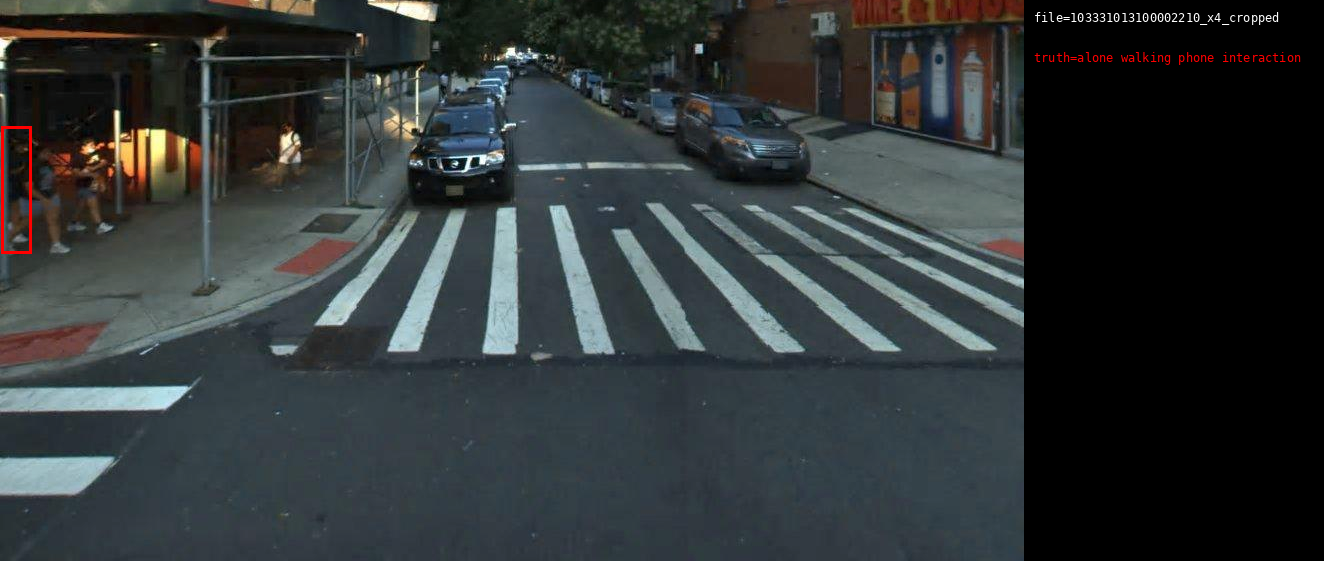

In [8]:
# pass an ibox to view that box 
combos.view(ibox=0)

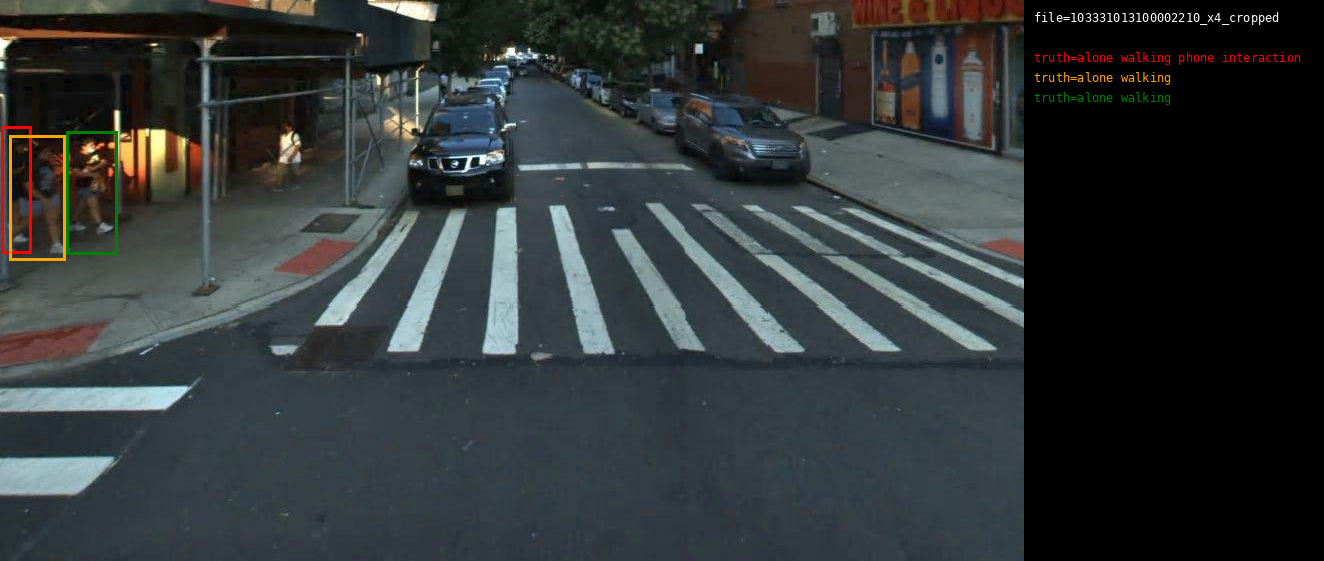

In [9]:
# supports multiple iboxes in same image
combos.view(ibox=[0, 1, 2])

### View a specific file

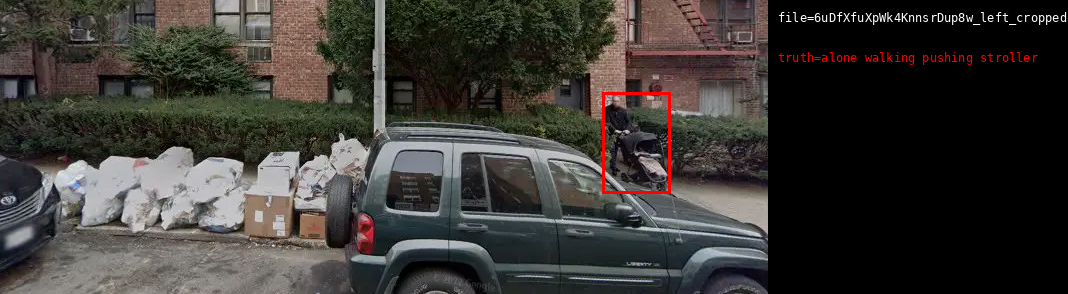

In [10]:
# view annotations for file GSV_177
combos.view(file='GSV_177')

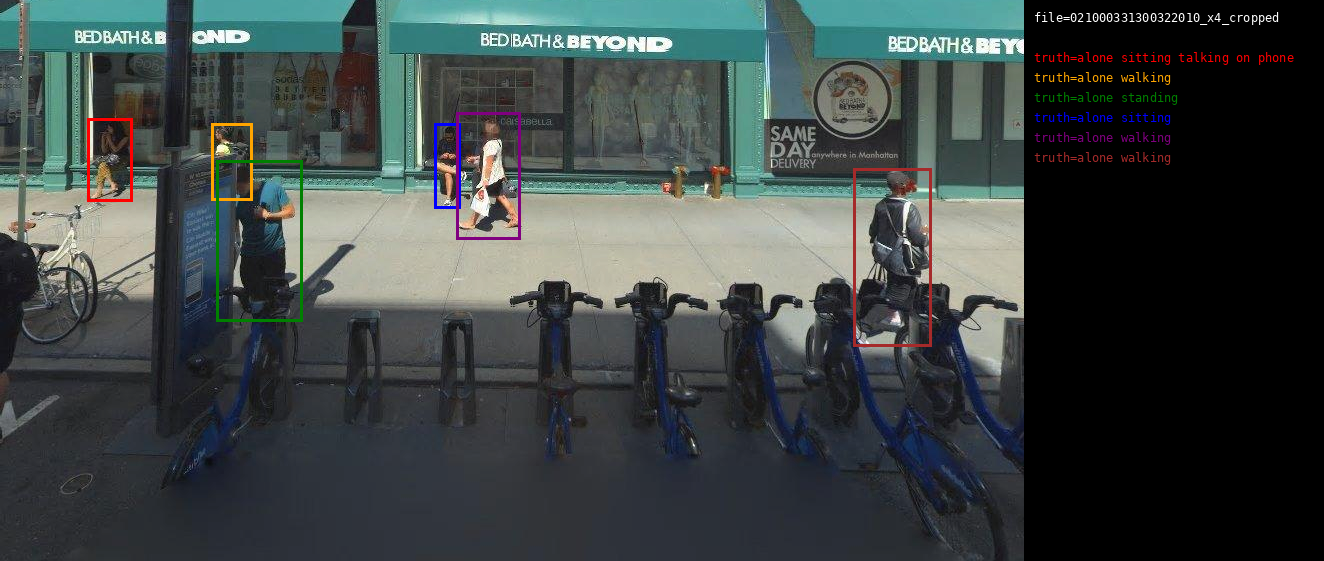

In [11]:
# view annotations for file 021000331300322010_x4_cropped
combos.view(file='021000331300322010_x4_cropped')



## View annotation boxes across several files

You may use `elsa.truth.views` to view your ground truth annotations across several files:

### Parameters
- loc: A boolean mask of which combos are to be viewed.
- ibox: if True, each box is viewed in a separate image.
- file: if True, each file is viewed in a separate image.
- background: background color of the images generated.

#### View annotation boxes that contain a substring

In [12]:

# view annotation boxes that specifically contain 'wheelchair'
# iterate across views for images given a boolean mask
loc = combos.contains_substring('wheelchair')
views = combos.views(loc=loc)

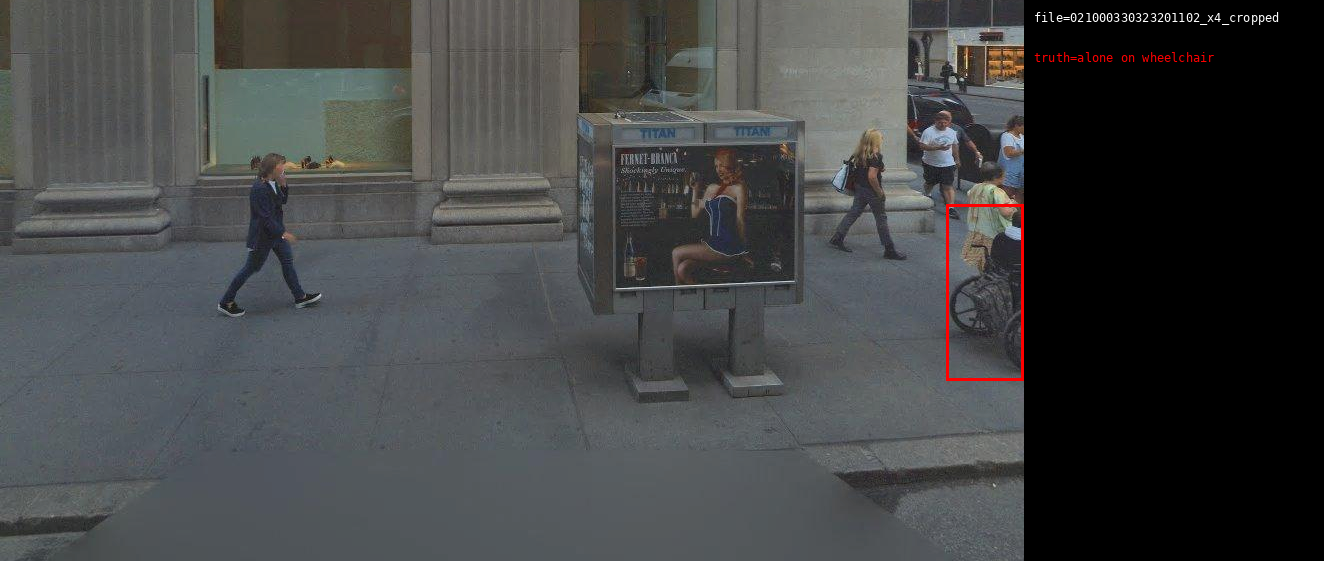

In [13]:
# calling next() on the views object returns the next image;
# each time you run this cell the next view will be shown
next(views)


### View combos that include specific labels or conditions

In [14]:
# view combos that include the label 'waiting in bus station' 
loc = combos.includes(label='waiting in bus station')
views = combos.views(loc=loc)

INFO     The following labels are not in the natural metadata: ['construction workers', 'construction worker', 'baby carriage pram', 'pushing wheelchair or stroller', 'stroller', 'shopping cart', 'street vendors', 'youngster', 'skating']


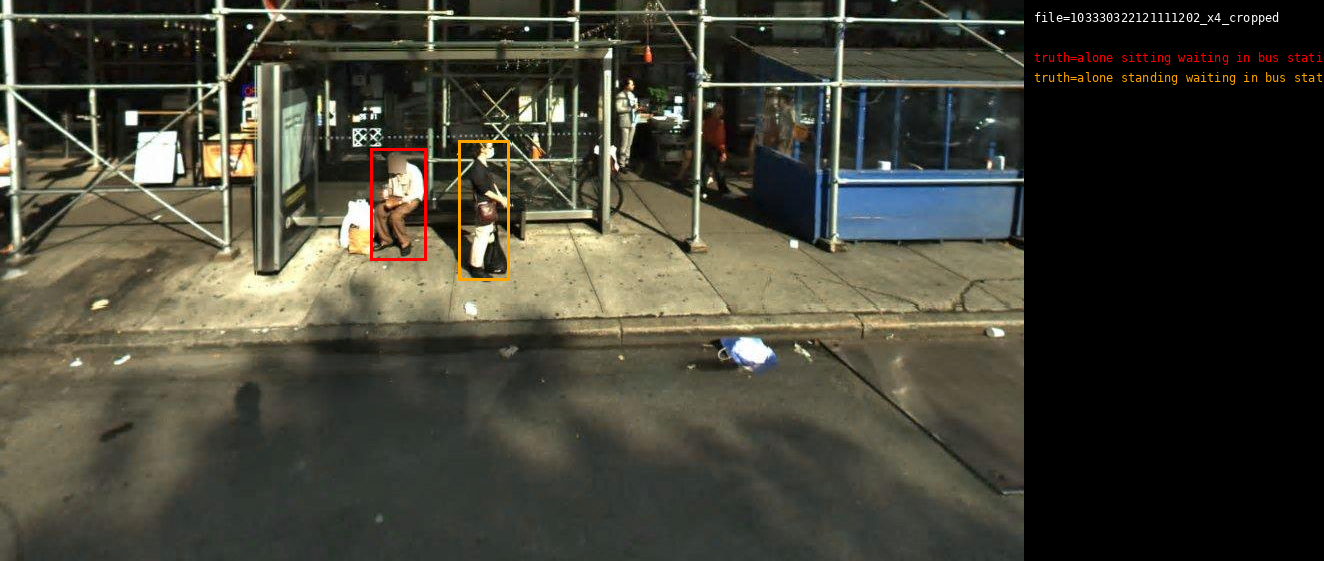

In [15]:
next(views)

In [16]:
# view combos that contain the labels 'talking' and 'dining'
loc = combos.includes(label='talking')
loc &= combos.includes(label='dining')
views = combos.views(loc=loc)

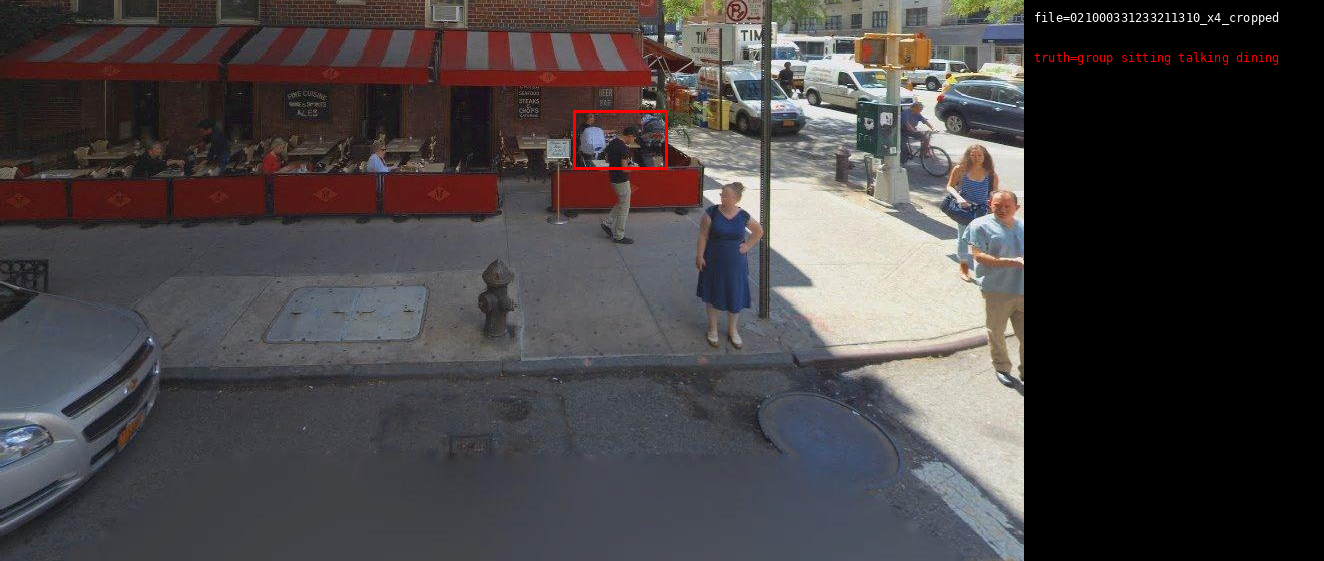

In [17]:
next(views)